# Purpose

# Imports

In [1]:
import numpy as np
import pandas as pd
import os, csv, glob
import matplotlib.pyplot as plt

In [2]:
from Bio.Blast import NCBIWWW
from Bio import SeqIO 
from Bio.Blast import NCBIXML

In [3]:
from thefuzz import fuzz

# Functions

In [4]:
obi_out_fld = '/home/dennislab2/Desktop/reads_out/'

In [5]:
file_paths = [os.path.join(obi_out_fld,file) for file in os.listdir(obi_out_fld)]
file_paths

['/home/dennislab2/Desktop/reads_out/plate1_12s_47_2_out.csv',
 '/home/dennislab2/Desktop/reads_out/plate1_12s_18_2_out.csv',
 '/home/dennislab2/Desktop/reads_out/plate23_12s_25_2_out.csv',
 '/home/dennislab2/Desktop/reads_out/plate23_12s_63_1_out.csv',
 '/home/dennislab2/Desktop/reads_out/plate23_12s_52_2_out.csv',
 '/home/dennislab2/Desktop/reads_out/plate1_12s_21_1_out.csv',
 '/home/dennislab2/Desktop/reads_out/plate23_12s_75_2_out.csv',
 '/home/dennislab2/Desktop/reads_out/plate23_12s_55_1_out.csv',
 '/home/dennislab2/Desktop/reads_out/plate23_12s_13_1_out.csv',
 '/home/dennislab2/Desktop/reads_out/plate23_12s_46_1_out.csv',
 '/home/dennislab2/Desktop/reads_out/plate23_12s_50_2_out.csv',
 '/home/dennislab2/Desktop/reads_out/plate23_12s_50_1_out.csv',
 '/home/dennislab2/Desktop/reads_out/plate1_12s_28_1_out.csv',
 '/home/dennislab2/Desktop/reads_out/plate23_12s_1_2_out.csv',
 '/home/dennislab2/Desktop/reads_out/plate23_12s_74_1_out.csv',
 '/home/dennislab2/Desktop/reads_out/plate23_

# Use case

# Procedure

In [6]:
file = pd.read_table(file_paths[0])
file

,NUC_SEQ,BEST_MATCH_TAXIDS,BEST_IDENTITY,ID,SCIENTIFIC_NAME,COUNT,QUALITY,ID_STATUS,BEST_MATCH_IDS,DEFINITION,TAXID
0,aaactnggattagataccntattntgctnagccataancctaaata...,NaN,0.0,MN00399:127:000H5JJTV:1:11101:3494:1056,NaN,1,"[32, 37, 37, 37, 32, 2, 32, 37, 37, 37, 37, 37...",False,NaN,2:N:0:GGTTGANC+AACGTGGA,None
1,aaactnggattagataccntattntgctnagccataancctaaata...,NaN,0.0,MN00399:127:000H5JJTV:1:11101:6759:1057,NaN,1,"[32, 37, 37, 37, 37, 2, 37, 37, 37, 37, 37, 37...",False,NaN,2:N:0:GGTTGANC+AACGTGGA,None
2,aaactnggattagataccntattntgctnagccataancctaaata...,NaN,0.0,MN00399:127:000H5JJTV:1:11101:19505:1057,NaN,1,"[37, 37, 37, 37, 37, 2, 37, 37, 37, 37, 37, 37...",False,NaN,2:N:0:GGTTGANC+AACGTGGA,None
3,aaactnggattagataccntattntgcttagccataancctaaata...,NaN,0.0,MN00399:127:000H5JJTV:1:11101:5187:1058,NaN,1,"[37, 37, 37, 37, 37, 2, 37, 37, 37, 37, 37, 37...",False,NaN,2:N:0:GGTTGANC+AACGTGGA,None
4,aaactaggattagataccctattatgcttagccataaacctaaata...,NaN,0.0,MN00399:127:000H5JJTV:1:11101:5354:1064,NaN,1,"[32, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3...",False,NaN,2:N:0:GGTTGAAC+AACGTGGA,None
...,...,...,...,...,...,...,...,...,...,...,...
192569,agagcgacgggcgatgtgtgcgtacttcattgctcaattcaattaa...,NaN,0.0,MN00399:127:000H5JJTV:1:23104:23540:20385,NaN,1,"[32, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3...",False,NaN,2:N:0:GGTTGAAC+AACGTGGA,None
192570,aaactaggattagataccctattatgcttagccataaacctaaata...,NaN,0.0,MN00399:127:000H5JJTV:1:23104:9470:20390,NaN,1,"[32, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3...",False,NaN,2:N:0:GGTTGAAC+AACGTGGA,None
192571,agagcgacgggcgatgtgtgcgtacttcattgctcaattcaattaa...,NaN,0.0,MN00399:127:000H5JJTV:1:23104:20402:20392,NaN,1,"[32, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3...",False,NaN,2:N:0:GGTTGAAC+AACGTGGA,None
192572,aaactaggattagatacccnattatgcttagccataaacctaaata...,NaN,0.0,MN00399:127:000H5JJTV:1:23104:10710:20397,NaN,1,"[32, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3...",False,NaN,2:N:0:GGTTGAAC+AACGTGGA,None


In [101]:
file.NUC_SEQ[100]

'aaactaggattagataccctattatgcttagccataaacctaaataattaaatttaacaaaactatttgccagagaactactagccatagcttaaaactcaaaggacttggcggtactttatatccatctagaggagcctgttctataaa'

In [ ]:
# want to get unique sequences, and then remove

In [24]:
len(unique_seq)

2242

In [60]:
unique_scinames = np.unique(file.SCIENTIFIC_NAME.dropna())

In [61]:
for sci_name in unique_scinames:
    print(sci_name,len(file[file.SCIENTIFIC_NAME==sci_name]))

In [62]:
all_seqs = file.NUC_SEQ.to_list()
all_seqs

['aaactnggattagataccntattatnctnagcnntanncntanannantanntntancnanactatnngcnngananntantngncnnancntnnnncncnaagnncnnnnnggtnctnanannnnananagangagcctntnctataat',
 'aaactnggattagataccntattatnctnagcnntanncntanatnantanntntancnanactatttgccngananntantagncnnancntnnnncncnaagnncnngnnggtnctttnannnnancnagaggagcctgttctataat',
 'aaactnggattagataccntattatnctnagcnntanncntanatnantanatntancnanactatttgccnganaantantagccnnancttnnnncncnaagnnannggnggtnctttntnannananagaggagcctgttctataat',
 'agagcnacgggcgatgtgngcgtacntcnttgnncanntnaantangntcnctnttntnantttactactanatnctncttagtccnntngttnnanananggtnnannaatgttnttttnananaanangtagcccatttcttcccatt',
 'agagcnacgggcgatgtgngcgtacntcattgnncanntnaantangntcnctnttntnantttactactanatnctncttagtccnntngttnnatananggtnnagnaatgttnttttntnanaanangtagcccatttcttcccatt',
 'aaactnggattagataccntattatncttagcnntaancntanatnantanatntancnaaactatttgccnganaantactagccnnancttnnaactcnaagnacttggcggtnatttntntncatctagaggagcctgttctataat',
 'agagcnacgggcgatgtgngcgtacntcattgnncaantnaantangntcnctattntnaatttacta

In [38]:
all_seqs[0]

'agagcgacgggcgatgtgtgcgtacttcattgctcaattcaattaagctctctattcttaatttactactaaatcctccttagtcctttagtttcataaagggtatagtaatgttcttttataagaaaatgtagcccatttcttcccatt'

In [43]:
listtest=[1,2,3,4,5,6]
sublist=[False, True, True, True, False, False]
np.array(listtest)[np.array(sublist)]

array([2, 3, 4])

In [19]:
pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))

,A,B
0,5,6
1,7,8


In [ ]:
for file_path in file_paths:
    file = pd.read_table(file_path)
    all_seqs= np.array(file.NUC_SEQ)
    list_of_seqs_lens=[]
    list_of_seqs=[]
    print('starting while loop for file_path {}'.format(file_path))

    while len(all_seqs)>1:
        seq = all_seqs[0]# add a sequence
        bool_list=[]
        # get similar sequences, delete from the all_seqs list before iterating
        for i in np.arange(0,len(all_seqs)):
                    # if 97% or better match, add a number fo the n_val
                    if fuzz.ratio(seq,all_seqs[i]) >96:
                        bool_list.append(False)
                    else:
                        bool_list.append(True)
        num_of_seqs = len(bool_list) - np.sum(bool_list)
        if num_of_seqs > 15:
            list_of_seqs.append(seq)
            list_of_seqs_lens.append(num_of_seqs)
        all_seqs = all_seqs[bool_list]
    # save out as fasta!
    # read in fasta!
    result_list = []
    seq_counter=-1
    for seq in list_of_seqs:
        seq_counter+=1
        print('starting blast {} of {}'.format(seq_counter,len(list_of_seqs)))
        result_handle = NCBIWWW.qblast('blastn','nt',seq)
        results_filename = "/home/dennislab2/Desktop/ncbi_outputs/results_{}_{}.xml".format(file_path.split('/')[-1].split('_out.csv')[0],seq_counter)
        data_tuples=[]
        with open(results_filename, 'w') as save_file: 
            blast_results = result_handle.read()
            save_file.write(blast_results)
        for record in NCBIXML.parse(open(results_filename)): 
            if record.alignments: 
                for align in record.alignments: 
                    for hsp in align.hsps: 
                        if hsp.expect < 1e-10:
                            data_tuples.append((align.hit_def,align.accession,hsp.query,hsp.sbjct,hsp.identities,hsp.expect))
        pd.DataFrame(data_tuples,columns=['hit_definition','hit_accession','subject','identities','expect']).to_csv('/home/dennislab2/Desktop/ncbi_outputs/results_{}_{}.csv'.format(file_path.split('/')[-1].split('_out.csv')[0],seq_counter))

starting while loop for file_path /home/dennislab2/Desktop/reads_out/plate1_12s_47_2_out.csv
starting blast 0 of 22


In [51]:
file_path = file_paths[0]


'plate1_12s_47_2'

In [58]:
result_handle = NCBIWWW.qblast('blastn','nt',seq)

In [59]:
# add seq num/id
results_filename = "results_{}.xml".format(file_path.split('/')[-1].split('_out.csv')[0])
with open(results_filename, 'w') as save_file: 
    blast_results = result_handle.read()
    save_file.write(blast_results)

In [100]:
for record in NCBIXML.parse(open(results_filename)): 
    if record.alignments: 
        print("\n") 
        for align in record.alignments: 
            for hsp in align.hsps: 
                print("%s" % align.title[:100].split('|'))



['gi', '2461860460', 'dbj', 'AB092593.1', ' Mus musculus domesticus mitochondrial DNA, complete genome, strain:C57']
['gi', '2461860446', 'dbj', 'AB092592.1', ' Mus musculus domesticus mitochondrial DNA, complete genome, strain:C57']
['gi', '2452958533', 'emb', 'OX439034.1', ' Mus musculus genome assembly, organelle: mitochondrion']
['gi', '2415280279', 'emb', 'OX390165.1', ' Mus musculus genome assembly, organelle: mitochondrion']
['gi', '2415279407', 'emb', 'OX389814.1', ' Mus musculus genome assembly, organelle: mitochondrion']
['gi', '2327616453', 'gb', 'OM948981.1', ' Mus musculus strain C57BL/6NCrl mitochondrion, complete genome']
['gi', '2282749014', 'gb', 'MZ661208.1', ' Mus musculus domesticus voucher CSCF-MAM-1571089 12S ribosomal RNA gene']
['gi', '2259040164', 'emb', 'OW971803.1', ' Mus musculus genome assembly, organelle: mitochondrion']
['gi', '2259034981', 'emb', 'OW971782.1', ' Mus musculus musculus genome assembly, organelle: mitochondrion']
['gi', '2259022775', 'emb

In [118]:
print(align.accession)
print(align.hit_def)

LC552884
Mus musculus HS4411 mitochondrial DNA, complete genome


In [107]:
x=[]
x.append((hsp.query,hsp.sbjct,hsp.identities,hsp.expect))
x.append((hsp.query,hsp.sbjct,hsp.identities,hsp.expect))
pd.DataFrame(x,columns=['query','subject','identities','expect'])

,query,subject,identities,expect
0,AAACTAGGATTAGATACCCTATTATGCTTAGCCATAAACCTAAATA...,AAACTGGGATTAGATACCCCACTATGCTTAGCCATAAACCTAAATA...,143,1.024950e-59
1,AAACTAGGATTAGATACCCTATTATGCTTAGCCATAAACCTAAATA...,AAACTGGGATTAGATACCCCACTATGCTTAGCCATAAACCTAAATA...,143,1.024950e-59


In [93]:
print(hsp.align_length)
print(hsp.bits)
print(hsp.expect)
print(hsp.identities)
print(hsp.query)
print(hsp.sbjct)
print(hsp.score)
(hsp.query,hsp.subject,hsp.identities,hsp.expect)

149
243.839
1.02495e-59
143
AAACTAGGATTAGATACCCTATTATGCTTAGCCATAAACCTAAATAATTAAATTTAACGAAACTATTTGCCAGAGAACTACTAGCCATANCTTAAAACTCAAAGGACTTGGCGATACTTTATATCCATCTAGAGGAGCCTGTTCTATAA
AAACTGGGATTAGATACCCCACTATGCTTAGCCATAAACCTAAATAATTAAATTTAACAAAACTATTTGCCAGAGAACTACTAGCCATAGCTTAAAACTCAAAGGACTTGGCGGTACTTTATATCCATCTAGAGGAGCCTGTTCTATAA
269.0


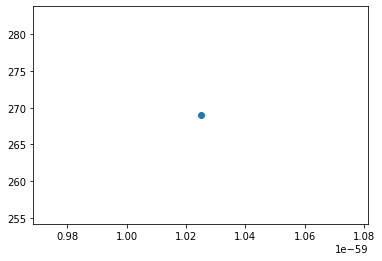

In [94]:
scores=[]
es = []
for hsp in align.hsps:
    es.append(hsp.expect)
    scores.append(hsp.score)
    

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

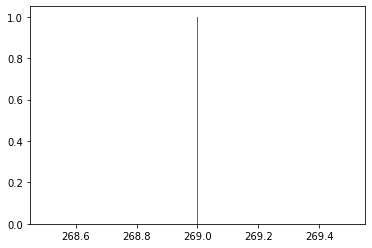

In [99]:
plt.hist(scores,bins=1000)

In [ ]:
# query cover > 70%
# e value?
# per. ident
# scientific name

## for BLAST
https://www.tutorialspoint.com/biopython/biopython_overview_of_blast.htm

- make a fasta file for each *un-identified* sequence
- load a fasta file for each *un-identified* sequence

`seq_record = next(SeqIO.parse(open('blast_example.fasta'),'fasta')) `

- blast it 
    - n blast n
    - n blast p

`result_handle = NCBIWWW.qblast("blastn", "nt", sequence_data)`


```
with open('results.xml', 'w') as save_file: 
    blast_results = result_handle.read()
    save_file.write(blast_results)
```     
- open file

```E_VALUE_THRESH = 1e-20 
for record in NCBIXML.parse(open("results.xml")): 
    if record.alignments: 
       print("\n") 
       print("query: %s" % record.query[:100]) 
       for align in record.alignments: 
          for hsp in align.hsps: 
             if hsp.expect < E_VALUE_THRESH: 
                print("match: %s " % align.title[:100])
```

In [146]:
file_nm='plate23_12s_26_1_out.csv'
df=pd.DataFrame(columns=col_nms)
df_seqdata=pd.DataFrame(columns=['file_nm','nuc_seq','count'])
file = pd.read_table(os.path.join(fld,file_nm))
unique_scinames = np.unique(file.SCIENTIFIC_NAME.dropna())
unique_scinames
subfile = file[file.SCIENTIFIC_NAME==unique_scinames[0]]

In [148]:
subfile

,TAXID,BEST_MATCH_IDS,COUNT,ID_STATUS,BEST_IDENTITY,NUC_SEQ,QUALITY,ID,DEFINITION,SCIENTIFIC_NAME,BEST_MATCH_TAXIDS
71,301514,['MN480464'],1,True,0.993333,ttttattttatttttaggtagtagtaaaaagaaacctaaaaaattt...,"[32, 37, 37, 37, 37, 32, 37, 37, 37, 37, 37, 3...",MN00399:128:000H5JLCJ:1:11101:19930:1334,1:N:0:AGACCTTG+GCACGTAA,Homidia socia,[301514]
241,301514,['MN480464'],1,True,0.986667,ttttattttatttttaggtagtagtaaaaagaaacctaaaaaattt...,"[37, 37, 37, 37, 37, 37, 14, 32, 37, 37, 37, 3...",MN00399:128:000H5JLCJ:1:11101:24825:2127,1:N:0:AGACCTTG+GCACGTAA,Homidia socia,[301514]
829,301514,['MN480464'],1,True,0.980132,tttttattttatttttaggtagtagtaaaaagaaacctaaaaaatt...,"[37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3...",MN00399:128:000H5JLCJ:1:11101:9052:4351,1:N:0:AGACCTTG+GCACGTAA,Homidia socia,[301514]
896,301514,['MN480464'],1,True,0.986667,ttttattttatttttaggtagtagtaaaaagaaacctaaaaaattt...,"[37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3...",MN00399:128:000H5JLCJ:1:11101:5489:4600,1:N:0:AGACCTTG+GCACGTAA,Homidia socia,[301514]
1103,301514,['MN480464'],1,True,0.993333,ttttattttatttttaggtagtagtaaaaagaaacctaaaaaattt...,"[37, 37, 37, 37, 32, 37, 37, 37, 37, 37, 37, 3...",MN00399:128:000H5JLCJ:1:11101:18400:5448,1:N:0:AGACCTTG+GCACGTAA,Homidia socia,[301514]
...,...,...,...,...,...,...,...,...,...,...,...
122886,301514,['MN480464'],1,True,0.993333,ttttattttatttttaggtagtagtaaaaagaaacctaaaaaattt...,"[37, 37, 37, 37, 37, 32, 37, 37, 37, 37, 37, 3...",MN00399:128:000H5JLCJ:1:23104:21460:9148,1:N:0:AGACCTTG+GCACGTAA,Homidia socia,[301514]
124860,301514,['MN480464'],1,True,0.993333,ttttattttatttttaggtagtagtaaaaagaaacctaaaaaattt...,"[37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3...",MN00399:128:000H5JLCJ:1:23104:9425:16691,1:N:0:AGACCTAG+GCACGTAA,Homidia socia,[301514]
124919,301514,['MN480464'],1,True,0.980132,tttattttatttttaggtagtagtaaaaagaaacctaaaaaatttg...,"[37, 37, 37, 32, 37, 37, 37, 37, 37, 37, 37, 3...",MN00399:128:000H5JLCJ:1:23104:1676:16971,1:N:0:AGACCTTG+GCACGTAA,Homidia socia,[301514]
125124,301514,['MN480464'],1,True,0.993333,ttttattttatttttaggtagtagtaaaaagaaacctaaaaaattt...,"[37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3...",MN00399:128:000H5JLCJ:1:23104:11433:17703,1:N:0:AGACCTTG+GCACGTAA,Homidia socia,[301514]


In [171]:
col_nms=['file_nm','sci_nm','count']
df=pd.DataFrame(columns=col_nms)
df_seqdata=pd.DataFrame(columns=['file_nm','nuc_seq','count'])
for file_nm in os.listdir(fld):
    print(file_nm)
    file = pd.read_table(os.path.join(fld,file_nm))
    unique_scinames = np.unique(file.SCIENTIFIC_NAME.dropna())
    list_of_vals=[]
    for sci_nm in unique_scinames:
        list_of_vals.append([file_nm,sci_nm,len(file[file.SCIENTIFIC_NAME==sci_nm])])
    df2 = pd.DataFrame(list_of_vals, columns=col_nms)
    df=df.append(df2,ignore_index=True)

plate1_12s_47_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_18_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_25_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_63_1_out.csv
plate23_12s_52_2_out.csv
plate1_12s_21_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_75_2_out.csv
plate23_12s_55_1_out.csv
plate23_12s_13_1_out.csv
plate23_12s_46_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_50_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_50_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_28_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_1_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_74_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_23_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_24_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_33_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_28_2_out.csv
plate1_12s_29_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_6_2_out.csv
plate1_12s_35_2_out.csv
plate1_12s_56_2_out.csv
plate23_12s_61_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_38_1_out.csv
plate23_12s_70_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_11_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_38_2_out.csv
plate1_12s_39_1_out.csv
plate23_12s_47_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_46_1_out.csv
plate23_12s_14_2_out.csv
plate23_12s_65_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_20_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_50_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_52_1_out.csv
plate1_12s_15_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_49_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_6_1_out.csv
plate1_12s_37_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_5_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_40_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_24_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_40_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_2_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_31_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_9_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_70_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_44_2_out.csv
plate23_12s_51_1_out.csv
plate1_12s_16_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_53_1_out.csv
plate23_12s_39_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_2_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_48_2_out.csv
plate1_12s_33_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_4_1_out.csv
plate23_12s_47_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_7_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_60_1_out.csv
plate23_12s_51_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_48_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_28_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_55_2_out.csv
plate1_12s_19_2_out.csv
plate1_12s_23_2_out.csv
plate23_12s_10_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_30_1_out.csv
plate23_12s_40_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_1_1_out.csv


/tmp/ipykernel_681725/2269263605.py:6: DtypeWarning: Columns (2,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_table(os.path.join(fld,file_nm))
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_14_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_19_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_13_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_58_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_36_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_55_1_out.csv
plate23_12s_69_1_out.csv
plate23_12s_4_2_out.csv
plate1_12s_18_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_43_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_56_1_out.csv
plate1_12s_21_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_41_2_out.csv
plate1_12s_17_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_49_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_31_1_out.csv
plate23_12s_75_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_68_1_out.csv
plate1_12s_23_1_out.csv
plate1_12s_22_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_27_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_41_1_out.csv
plate23_12s_31_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_37_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_20_1_out.csv
plate23_12s_60_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_15_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_53_2_out.csv
plate1_12s_5_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_67_2_out.csv
plate23_12s_19_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_32_2_out.csv
plate23_12s_33_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_32_1_out.csv
plate23_12s_64_1_out.csv
plate23_12s_28_1_out.csv
plate1_12s_27_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_31_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_71_1_out.csv
plate1_12s_8_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_35_1_out.csv
plate23_12s_66_1_out.csv
plate23_12s_32_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_26_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_53_1_out.csv
plate23_12s_12_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_45_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_23_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_7_2_out.csv
plate23_12s_39_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_14_1_out.csv
plate1_12s_7_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_51_2_out.csv
plate23_12s_24_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_51_1_out.csv
plate1_12s_48_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_8_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_12_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_72_2_out.csv
plate23_12s_21_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_9_2_out.csv
plate23_12s_69_2_out.csv
plate1_12s_52_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_3_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_63_2_out.csv
plate1_12s_22_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_1_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_16_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_45_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_2_2_out.csv
plate23_12s_38_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_57_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_30_1_out.csv
plate23_12s_26_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_48_1_out.csv
plate1_12s_59_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_43_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_34_1_out.csv
plate1_12s_5_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_10_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_58_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_18_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_44_1_out.csv
plate23_12s_74_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_56_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_21_2_out.csv
plate23_12s_36_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_35_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_37_2_out.csv
plate23_12s_22_2_out.csv
plate23_12s_62_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_55_2_out.csv
plate1_12s_1_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_52_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_3_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_57_2_out.csv
plate1_12s_49_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_38_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_64_2_out.csv
plate1_12s_58_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_10_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_15_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_58_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_26_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_29_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_54_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_6_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_12_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_62_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_17_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_13_2_out.csv
plate23_12s_20_2_out.csv
plate23_12s_42_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_46_2_out.csv
plate23_12s_18_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_59_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_47_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_59_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_7_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_14_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_4_1_out.csv
plate1_12s_57_1_out.csv
plate1_12s_43_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_6_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_8_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_66_2_out.csv
plate23_12s_30_2_out.csv
plate1_12s_25_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_73_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_8_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_43_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_27_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_9_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_73_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_44_2_out.csv
plate1_12s_11_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_59_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_5_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_44_1_out.csv
plate23_12s_15_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_33_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_39_2_out.csv
plate1_12s_9_1_out.csv
plate1_12s_11_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_35_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_54_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_68_2_out.csv
plate1_12s_3_2_out.csv
plate23_12s_56_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_25_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_22_1_out.csv
plate23_12s_17_1_out.csv


/tmp/ipykernel_681725/2269263605.py:6: DtypeWarning: Columns (6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_table(os.path.join(fld,file_nm))
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_71_2_out.csv
plate23_12s_25_1_out.csv


/tmp/ipykernel_681725/2269263605.py:6: DtypeWarning: Columns (1,4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_table(os.path.join(fld,file_nm))
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_29_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_24_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_10_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_30_2_out.csv
plate1_12s_34_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_34_2_out.csv
plate23_12s_37_1_out.csv
plate1_12s_42_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_40_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_13_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_3_1_out.csv
plate23_12s_65_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_36_2_out.csv
plate1_12s_54_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_29_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_20_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_45_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_27_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_46_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_50_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_4_2_out.csv
plate23_12s_32_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_17_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_72_1_out.csv
plate23_12s_57_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_36_1_out.csv
plate23_12s_67_1_out.csv
plate23_12s_11_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_34_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_42_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_12_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_26_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_53_2_out.csv
plate1_12s_42_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_16_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_19_1_out.csv
plate23_12s_49_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_2_1_out.csv
plate23_12s_41_2_out.csv
plate23_12s_41_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_45_2_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)
/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate23_12s_16_2_out.csv
plate23_12s_61_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


plate1_12s_54_1_out.csv


/tmp/ipykernel_681725/2269263605.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2,ignore_index=True)


In [174]:
df.sort_values('file_nm')

,file_nm,sci_nm,count
5,plate1_12s_13_1_out.csv,Gryllodes,234
11,plate1_12s_1_1_out.csv,Gryllodes,721
8,plate1_12s_22_1_out.csv,Gryllodes,1886
7,plate1_12s_22_2_out.csv,Gryllodes,1749
19,plate1_12s_24_1_out.csv,Gryllodes,395
0,plate1_12s_24_2_out.csv,Gryllodes,385
14,plate1_12s_29_1_out.csv,Gryllodes,501
1,plate1_12s_29_2_out.csv,Gryllodes,419
24,plate1_12s_42_1_out.csv,Gryllodes,82
20,plate1_12s_42_2_out.csv,Gryllodes,96


In [ ]:
col_nms=['file_nm','sci_nm','count']
df=pd.DataFrame(columns=col_nms)
df_seqdata=pd.DataFrame(columns=['file_nm','nuc_seq','count'])
for file_nm in os.listdir(fld):
    print(file_nm)
    file = pd.read_table(os.path.join(fld,file_nm))
    unique_scinames = np.unique(file.SCIENTIFIC_NAME.dropna())
    list_of_vals=[]
    for sci_nm in unique_scinames:
        list_of_vals.append([file_nm,sci_nm,len(file[file.SCIENTIFIC_NAME==sci_nm])])
    df2 = pd.DataFrame(list_of_vals, columns=col_nms)
    df=df.append(df2,ignore_index=True)

In [176]:
df.to_csv('/home/dennislab2/Desktop/summary.csv')

In [2]:
df = pd.read_csv('/Users/dennise/Desktop/summary.csv')

In [3]:
df

,Unnamed: 0,file_nm,sci_nm,count
0,0,uniplant_10_1_out.tsv,Glycine subgen. Soja,1
1,1,uniplant_10_1_out.tsv,Hordeinae,1
2,2,uniplant_10_1_out.tsv,Petrosaviidae,110
3,3,uniplant_10_1_out.tsv,Potentilla,34
4,4,uniplant_10_1_out.tsv,Potentilla simplex,18
...,...,...,...,...
503,503,uniplant_8_1_out.tsv,Triticum,107
504,504,uniplant_8_1_out.tsv,Triticum aestivum,8750
505,505,uniplant_9_1_out.tsv,Petrosaviidae,27
506,506,uniplant_9_1_out.tsv,Triticum,8


In [12]:
file.columns

Index(['BEST_MATCH_IDS', 'ID', 'BEST_IDENTITY', 'ID_STATUS', 'DEFINITION',
       'TAXID', 'SCIENTIFIC_NAME', 'QUALITY', 'NUC_SEQ', 'BEST_MATCH_TAXIDS',
       'COUNT'],
      dtype='object')

In [13]:
file

,BEST_MATCH_IDS,ID,BEST_IDENTITY,ID_STATUS,DEFINITION,TAXID,SCIENTIFIC_NAME,QUALITY,NUC_SEQ,BEST_MATCH_TAXIDS,COUNT
0,NaN,MN00399:123:000H537V2:1:11101:4877:1012,0.00000,False,1:N:0:AGCCTATN+GTTACGCA,None,NaN,"[37, 37, 37, 2, 37, 37, 32, 37, 37, 37, 37, 14...",cccntttgacttggggtcacggtcgaagnnacgtgcgcttcgtttg...,NaN,1
1,NaN,MN00399:123:000H537V2:1:11101:12055:1020,0.00000,False,1:N:0:AGCCTATN+GTTACGCA,None,NaN,"[37, 37, 37, 37, 37, 37, 32, 37, 37, 37, 37, 3...",tgtgaattgcaggatcccgcgaaccatcnngtctttgaacgcaagt...,NaN,1
2,NaN,MN00399:123:000H537V2:1:11101:21707:1025,0.00000,False,1:N:0:AGCCTATN+GTTACGCA,None,NaN,"[37, 37, 37, 37, 37, 37, 37, 37, 14, 14, 37, 3...",cccgtttgacttgaggtcgcggtcgaagcgacgtgcgcttcgtttg...,NaN,1
3,['OU343190'],MN00399:123:000H537V2:1:11101:13162:1048,0.97351,True,1:N:0:AGCCTATC+GTTACGCA,4565,Triticum aestivum,"[37, 37, 37, 14, 37, 37, 37, 37, 37, 37, 37, 3...",tgtgaattgcaggatcccgcgaaccatcgagtctttgaacgcaagt...,[4565],1
4,NaN,MN00399:123:000H537V2:1:11101:8866:1056,0.00000,False,1:N:0:AGCCTATC+GTTACGCA,None,NaN,"[32, 37, 37, 37, 37, 37, 37, 37, 37, 32, 32, 3...",cccgtttgatttggggtctcggtcgaagcgacgtgcgcttcgtttg...,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
47559,NaN,MN00399:123:000H537V2:1:23104:19966:20286,0.00000,False,1:N:0:AGCCTATC+GTTACGCA,None,NaN,"[37, 37, 37, 32, 37, 37, 37, 37, 37, 37, 37, 3...",cccgtttgatttggggtcgcggtcgaagcgacgtgcgcttcgtttg...,NaN,1
47560,NaN,MN00399:123:000H537V2:1:23104:17571:20294,0.00000,False,1:N:0:AGCCTATC+GTTACACA,None,NaN,"[37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3...",tgtgaattgcaggatcccgtgaaccatcgagtttttgaacgcaagt...,NaN,1
47561,NaN,MN00399:123:000H537V2:1:23104:22376:20341,0.00000,False,1:N:0:AGCCTATC+GTTACGCA,None,NaN,"[32, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3...",cgaagcgacgtgcgcttcgtttgttgggtcgttcaaaggtcataat...,NaN,1
47562,NaN,MN00399:123:000H537V2:1:23104:4771:20347,0.00000,False,1:N:0:AGCCTATC+GTTACGCA,None,NaN,"[37, 37, 37, 32, 37, 37, 14, 32, 37, 37, 37, 3...",cccgcctgatttggggtcgcggtcgaagcgacgtgcgcttcgtttg...,NaN,1


1